<a href="https://colab.research.google.com/github/Sergio-Deluich-Kaufmann/csci167-repository-sdk/blob/main/My%20Notebooks%20/%20project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Deep Learning Course Project - CIFAR-10
   ## 1. Setup and Imports
   ## 2. Data Loading and Exploration
   ## 3. Data Preprocessing
   ## 4. Model Definitions
   ## 5. Training Infrastructure
   ## 6. Experiments
   ## 7. Results and Analysis

In [ ]:
import torch
print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
print(f"CUDA device: {torch.cuda.get_device_name(0) if torch.cuda.is_available() else 'No GPU'}")

PyTorch version: 2.9.0+cu126
CUDA available: True
CUDA device: Tesla T4


In [ ]:
# more libraries
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader

# For visualization and analysis
import matplotlib.pyplot as plt
import numpy as np

# For progress bars (optional but nice)
from tqdm import tqdm

print("All libraries imported successfully!")

All libraries imported successfully!


In [ ]:
# CIFAR-10 from torchvision
transform = transforms.Compose([
    transforms.ToTensor(),  # Converts PIL image to PyTorch tensor
])

# Load training data
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

# Load test data
testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

print(f"Training samples: {len(trainset)}")
print(f"Test samples: {len(testset)}")

100%|██████████| 170M/170M [00:14<00:00, 11.7MB/s]


Training samples: 50000
Test samples: 10000


In [ ]:
# CIFAR-10 class names
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
           'dog', 'frog', 'horse', 'ship', 'truck']

print(f"Number of classes: {len(classes)}")
print(f"Classes: {classes}")

Number of classes: 10
Classes: ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


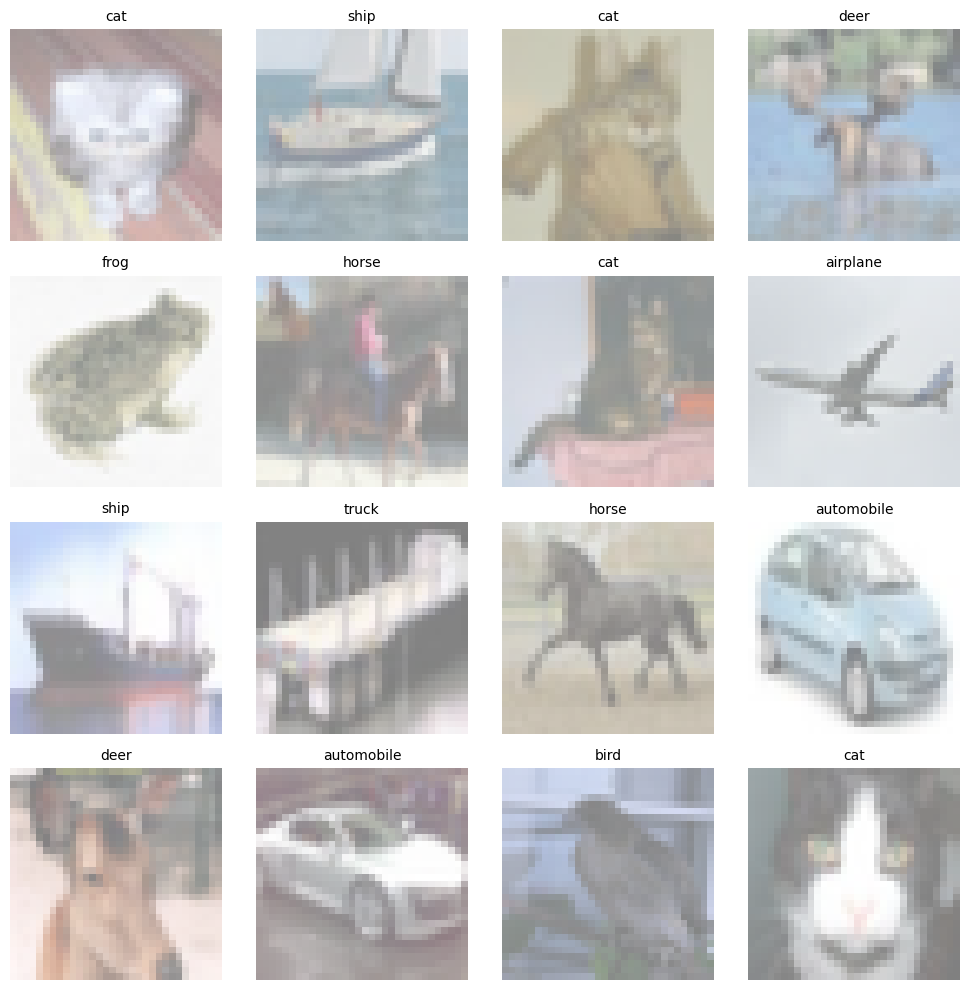


16 random samples from CIFAR-10 training set


In [ ]:
# Function to display images
def imshow(img):
    """Display a tensor image"""
    img = img / 2 + 0.5  # Unnormalize (CIFAR-10 images are normalized)
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.axis('off')

# Get some random training images
dataiter = iter(DataLoader(trainset, batch_size=16, shuffle=True))
# Shuffling ensures each batch has mixed classes
images, labels = next(dataiter)

# Create a grid of images
fig, axes = plt.subplots(4, 4, figsize=(10, 10))
for idx, ax in enumerate(axes.flat):
    img = images[idx]
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy()
    ax.imshow(np.transpose(npimg, (1, 2, 0)))
    ax.set_title(classes[labels[idx]], fontsize=10)
    ax.axis('off')

plt.tight_layout()
plt.show()

print("\n16 random samples from CIFAR-10 training set")

In [ ]:
print('So far so good')

So far so good


In [ ]:
# STATS
print("="*50)
print("CIFAR-10 DATASET STATISTICS")
print("="*50)

# Basic info
print(f"\nDataset Size:")
print(f"Training samples: {len(trainset):,}")
print(f"Test samples: {len(testset):,}")
print(f"Total samples: {len(trainset) + len(testset):,}")

# Image info
sample_image, sample_label = trainset[0]
print(f"\nImage Properties:")
print(f"Image shape: {sample_image.shape}")
print(f"Image size: {sample_image.shape[1]}x{sample_image.shape[2]} pixels")
print(f"Color channels: {sample_image.shape[0]} (RGB)")
print(f"Data type: {sample_image.dtype}")
print(f"Value range: [{sample_image.min():.2f}, {sample_image.max():.2f}]")

# Class info
print(f"\nClasses:")
print(f"Number of classes: {len(classes)}")
print(f"Class names: {', '.join(classes)}")

# Check class balance
print(f"\nClass Distribution (training set):")
class_counts = {}
for _, label in trainset:
    class_name = classes[label]
    class_counts[class_name] = class_counts.get(class_name, 0) + 1

for class_name, count in class_counts.items():
    print(f"   {class_name:12s}: {count:,} images ({count/len(trainset)*100:.1f}%)")

print("\nDataset looks good. No biases. Balanced")

CIFAR-10 DATASET STATISTICS

Dataset Size:
Training samples: 50,000
Test samples: 10,000
Total samples: 60,000

Image Properties:
Image shape: torch.Size([3, 32, 32])
Image size: 32x32 pixels
Color channels: 3 (RGB)
Data type: torch.float32
Value range: [0.00, 1.00]

Classes:
Number of classes: 10
Class names: airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck

Class Distribution (training set):
   frog        : 5,000 images (10.0%)
   truck       : 5,000 images (10.0%)
   deer        : 5,000 images (10.0%)
   automobile  : 5,000 images (10.0%)
   bird        : 5,000 images (10.0%)
   horse       : 5,000 images (10.0%)
   ship        : 5,000 images (10.0%)
   cat         : 5,000 images (10.0%)
   dog         : 5,000 images (10.0%)
   airplane    : 5,000 images (10.0%)

Dataset looks good. No biases. Balanced


In [ ]:
# Mean and Standard Deviation for each color channel
print("Computing pixel statistics across training set...")
print("(This takes ~30 seconds)\n")

mean = torch.zeros(3)
std = torch.zeros(3)
nb_samples = len(trainset)

for img, _ in trainset:
    mean += img.mean(dim=[1, 2])  # Average across height and width
    std += img.std(dim=[1, 2])

mean /= nb_samples
std /= nb_samples

print("=== Pixel Value Statistics (per channel) ===")
print(f"---Red   channel -> Mean: {mean[0]:.4f}, Std: {std[0]:.4f}")
print(f"---Green channel -> Mean: {mean[1]:.4f}, Std: {std[1]:.4f}")
print(f"---Blue  channel -> Mean: {mean[2]:.4f}, Std: {std[2]:.4f}")
print(f"-> Overall Mean: {mean.mean():.4f}")
print(f"-> Overall Std:  {std.mean():.4f}")

'''
Why this matters:
These values will be used to normalize images during training
Normalization helps the model learn faster and more stably
'''

Computing pixel statistics across training set...
(This takes ~30 seconds)

=== Pixel Value Statistics (per channel) ===
---Red   channel -> Mean: 0.4914, Std: 0.2023
---Green channel -> Mean: 0.4822, Std: 0.1994
---Blue  channel -> Mean: 0.4465, Std: 0.2010
-> Overall Mean: 0.4734
-> Overall Std:  0.2009


'\nWhy this matters:\nThese values will be used to normalize images during training\nNormalization helps the model learn faster and more stably\n'

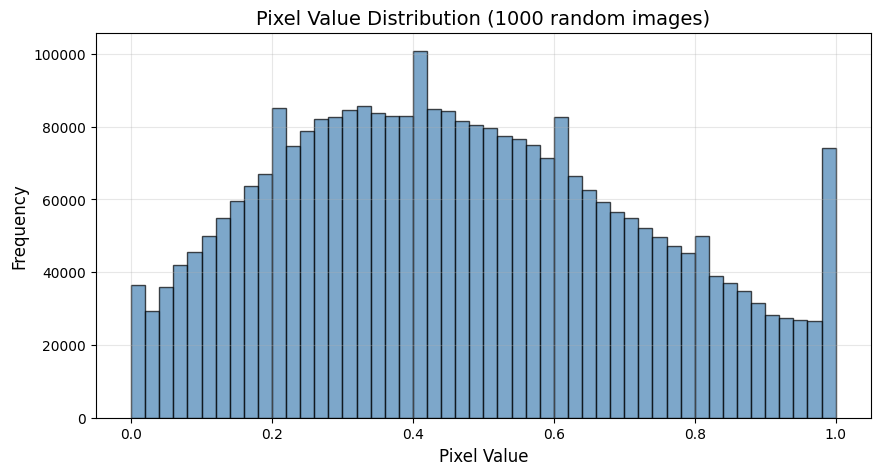

In [ ]:
# Test with 1000 random images and plot their pixel distributions
sample_indices = np.random.choice(len(trainset), 1000, replace=False)
sample_pixels = []

for idx in sample_indices:
    img, _ = trainset[idx]
    sample_pixels.append(img.numpy().flatten())

sample_pixels = np.concatenate(sample_pixels)

'''
This will show how pixel brightness is distributed
Most values are in the middle range (0.3-0.7)
This is typical for natural images
'''

# Create histogram
plt.figure(figsize=(10, 5))
plt.hist(sample_pixels, bins=50, alpha=0.7, color='steelblue', edgecolor='black')
plt.xlabel('Pixel Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Pixel Value Distribution (1000 random images)', fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
### BUILDING THE MODEL

In [ ]:
class SimpleCNN(nn.Module):
    """
    Simple CNN with 3 convolutional blocks
    Architecture: Conv -> ReLU -> MaxPool (x3) -> Fully Connected
    """
    def __init__(self, num_classes=10):
        super(SimpleCNN, self).__init__()

        # Convolutional Block 1: 32x32x3 -> 16x16x32
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1)
        self.pool1 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional Block 2: 16x16x32 -> 8x8x64
        self.conv2 = nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1)
        self.pool2 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Convolutional Block 3: 8x8x64 -> 4x4x128
        self.conv3 = nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, padding=1)
        self.pool3 = nn.MaxPool2d(kernel_size=2, stride=2)

        # Fully Connected Layers: 4x4x128 = 2048 -> 256 -> 10
        self.fc1 = nn.Linear(128 * 4 * 4, 256)
        self.dropout = nn.Dropout(0.5)
        self.fc2 = nn.Linear(256, num_classes)

    def forward(self, x):
        # Block 1
        x = F.relu(self.conv1(x))
        x = self.pool1(x)

        # Block 2
        x = F.relu(self.conv2(x))
        x = self.pool2(x)

        # Block 3
        x = F.relu(self.conv3(x))
        x = self.pool3(x)

        # Flatten for fully connected layers
        x = x.view(x.size(0), -1)  # Flatten: [batch, 128, 4, 4] -> [batch, 2048]

        # Fully connected layers
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.fc2(x)

        return x

# Test the model
model = SimpleCNN(num_classes=10)
print("SimpleCNN defined successfully!\n")

SimpleCNN defined successfully!



In [ ]:
def count_parameters(model):
    """Count total and trainable parameters in a model"""
    total_params = sum(p.numel() for p in model.parameters())
    trainable_params = sum(p.numel() for p in model.parameters() if p.requires_grad)
    return total_params, trainable_params

# Analyze SimpleCNN
total, trainable = count_parameters(model)

print("="*50)
print("SimpleCNN ARCHITECTURE SUMMARY")
print("="*50)
print(f"\nParameters:")
print(f"   Total parameters:     {total:,}")
print(f"   Trainable parameters: {trainable:,}")
print(f"   Model size:           ~{total*4/1024/1024:.2f} MB (float32)")

print(f"\nArchitecture:")
print(f"   Convolutional layers: 3")
print(f"   Fully connected layers: 2")
print(f"   Activation function: ReLU")
print(f"   Pooling: MaxPool2d")
print(f"   Regularization: Dropout(0.5)")

print(f"\nExpected Performance:")
print(f"   Baseline accuracy: ~65-75%")
print(f"   Training time: ~3-5 min (GPU) / ~30-45 min (CPU)")

print("\n" + "="*50)

SimpleCNN ARCHITECTURE SUMMARY

Parameters:
   Total parameters:     620,362
   Trainable parameters: 620,362
   Model size:           ~2.37 MB (float32)

Architecture:
   Convolutional layers: 3
   Fully connected layers: 2
   Activation function: ReLU
   Pooling: MaxPool2d
   Regularization: Dropout(0.5)

Expected Performance:
   Baseline accuracy: ~65-75%
   Training time: ~3-5 min (GPU) / ~30-45 min (CPU)



In [ ]:
# ResNet definition
import torchvision.models as models

class ResNet18_CIFAR(nn.Module):
    def __init__(self, num_classes=10):
        super(ResNet18_CIFAR, self).__init__()
        self.resnet = models.resnet18(pretrained=False)
        self.resnet.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=1, bias=False)
        self.resnet.maxpool = nn.Identity()
        num_features = self.resnet.fc.in_features
        self.resnet.fc = nn.Linear(num_features, num_classes)

    def forward(self, x):
        return self.resnet(x)

model_resnet = ResNet18_CIFAR(num_classes=10)
print("ResNet-18 defined successfully!")

dummy_input = torch.randn(1, 3, 32, 32)
output = model_resnet(dummy_input)
print(f"Input shape:  {dummy_input.shape}")
print(f"Output shape: {output.shape}")

ResNet-18 defined successfully!


/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


Input shape:  torch.Size([1, 3, 32, 32])
Output shape: torch.Size([1, 10])


In [ ]:
# Compare ResNet-8 and SimpleCNN
print("="*60)
print("MODEL ARCHITECTURE COMPARISON")
print("="*60)

models_dict = {
    'SimpleCNN': model,
    'ResNet-18': model_resnet
}

comparison_data = []

for model_name, model_obj in models_dict.items():
    total, trainable = count_parameters(model_obj)
    comparison_data.append({
        'Model': model_name,
        'Total Parameters': total,
        'Trainable Parameters': trainable,
        'Size (MB)': total * 4 / 1024 / 1024
    })

print(f"\n{'Model':<15} {'Parameters':<20} {'Size (MB)':<15}")
print("-" * 60)
for data in comparison_data:
    print(f"{data['Model']:<15} {data['Total Parameters']:>15,}    {data['Size (MB)']:>10.2f}")

print("\n" + "="*60)
print("KEY DIFFERENCES")
print("="*60)

print("\nSimpleCNN:")
print("  - Architecture: Basic 3-layer CNN")
print("  - Depth: Shallow (3 conv layers)")
print("  - Innovation: None (standard architecture)")
print("  - Speed: Fast training")
print("  - Expected accuracy: 65-75%")

print("\nResNet-18:")
print("  - Architecture: Residual Network")
print("  - Depth: Deep (18 layers)")
print("  - Innovation: Skip connections prevent vanishing gradients")
print("  - Speed: Slower training (more computation)")
print("  - Expected accuracy: 85-92%")

print("\n" + "="*60)

ratio = comparison_data[1]['Total Parameters'] / comparison_data[0]['Total Parameters']
print(f"\nResNet-18 has {ratio:.1f}x more parameters than SimpleCNN")
print("This allows it to learn more complex patterns but requires more computation")

MODEL ARCHITECTURE COMPARISON

Model           Parameters           Size (MB)      
------------------------------------------------------------
SimpleCNN               620,362          2.37
ResNet-18            11,173,962         42.63

KEY DIFFERENCES

SimpleCNN:
  - Architecture: Basic 3-layer CNN
  - Depth: Shallow (3 conv layers)
  - Innovation: None (standard architecture)
  - Speed: Fast training
  - Expected accuracy: 65-75%

ResNet-18:
  - Architecture: Residual Network
  - Depth: Deep (18 layers)
  - Innovation: Skip connections prevent vanishing gradients
  - Speed: Slower training (more computation)
  - Expected accuracy: 85-92%


ResNet-18 has 18.0x more parameters than SimpleCNN
This allows it to learn more complex patterns but requires more computation


In [ ]:
from torch.utils.data import random_split

train_size = int(0.9 * len(trainset))
val_size = len(trainset) - train_size

train_subset, val_subset = random_split(
    trainset,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

print("="*50)
print("DATASET SPLIT")
print("="*50)
print(f"\nOriginal training set: {len(trainset):,} images")
print(f"New split:")
print(f"  - Training:   {len(train_subset):,} images (90%)")
print(f"  - Validation: {len(val_subset):,} images (10%)")
print(f"  - Test:       {len(testset):,} images (separate)")
print("\n" + "="*50)

DATASET SPLIT

Original training set: 50,000 images
New split:
  - Training:   45,000 images (90%)
  - Validation: 5,000 images (10%)
  - Test:       10,000 images (separate)



In [ ]:
# Apply normalization
normalize_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.4914, 0.4822, 0.4465],
                        std=[0.2470, 0.2435, 0.2616])
])

trainset_normalized = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=False,
    transform=normalize_transform
)

testset_normalized = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=False,
    transform=normalize_transform
)

train_subset_norm, val_subset_norm = random_split(
    trainset_normalized,
    [train_size, val_size],
    generator=torch.Generator().manual_seed(42)
)

print("Data normalization applied!")
print(f"Mean: {[0.4914, 0.4822, 0.4465]}")
print(f"Std:  {[0.2470, 0.2435, 0.2616]}")

Data normalization applied!
Mean: [0.4914, 0.4822, 0.4465]
Std:  [0.247, 0.2435, 0.2616]


In [ ]:
batch_size = 64

train_loader = DataLoader(train_subset_norm, batch_size=batch_size, shuffle=True, num_workers=2)
val_loader = DataLoader(val_subset_norm, batch_size=batch_size, shuffle=False, num_workers=2)
test_loader = DataLoader(testset_normalized, batch_size=batch_size, shuffle=False, num_workers=2)

print("="*50)
print("DATALOADERS CREATED")
print("="*50)
print(f"\nBatch size: {batch_size}")
print(f"Training batches:   {len(train_loader)}")
print(f"Validation batches: {len(val_loader)}")
print(f"Test batches:       {len(test_loader)}")
print("\n" + "="*50)

DATALOADERS CREATED

Batch size: 64
Training batches:   704
Validation batches: 79
Test batches:       157



In [ ]:
# training function
def train_one_epoch(model, train_loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in tqdm(train_loader, desc="Training", leave=False):
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(train_loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc

In [ ]:
# evaluate function
def evaluate(model, data_loader, criterion, device):
    model.eval()
    running_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in tqdm(data_loader, desc="Evaluating", leave=False):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            running_loss += loss.item()
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += predicted.eq(labels).sum().item()

    epoch_loss = running_loss / len(data_loader)
    epoch_acc = 100. * correct / total

    return epoch_loss, epoch_acc


In [ ]:
# test loop
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")

test_model = SimpleCNN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(test_model.parameters(), lr=0.001)

print("\nTesting training loop with 1 epoch on SimpleCNN...")
print("="*50)

train_loss, train_acc = train_one_epoch(test_model, train_loader, criterion, optimizer, device)
val_loss, val_acc = evaluate(test_model, val_loader, criterion, device)

print(f"\nEpoch 1 Results:")
print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
print(f"  Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.2f}%")
print("\n" + "="*50)
print("Training infrastructure is working! Ready for full experiments.")

Using device: cuda

Testing training loop with 1 epoch on SimpleCNN...



Epoch 1 Results:
  Train Loss: 1.4899 | Train Acc: 45.75%
  Val Loss:   1.1404 | Val Acc:   58.66%

Training infrastructure is working! Ready for full experiments.


In [ ]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}\n")

model_simple = SimpleCNN(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_simple.parameters(), lr=0.001)

num_epochs = 30
history_simple = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

print("="*60)
print("TRAINING SimpleCNN - Baseline Configuration")
print("="*60)
print(f"Epochs: {num_epochs}")
print(f"Optimizer: Adam (lr=0.001)")
print(f"Batch size: 64")
print(f"Device: {device}\n")

best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f"Epoch [{epoch+1}/{num_epochs}]")

    train_loss, train_acc = train_one_epoch(model_simple, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model_simple, val_loader, criterion, device)

    history_simple['train_loss'].append(train_loss)
    history_simple['train_acc'].append(train_acc)
    history_simple['val_loss'].append(val_loss)
    history_simple['val_acc'].append(val_acc)

    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        print(f"  ✓ New best validation accuracy!")
    print()

print("="*60)
print(f"SimpleCNN Training Complete!")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")
print("="*60)

Using device: cuda

TRAINING SimpleCNN - Baseline Configuration
Epochs: 30
Optimizer: Adam (lr=0.001)
Batch size: 64
Device: cuda

Epoch [1/30]


  Train Loss: 1.5297 | Train Acc: 44.25%
  Val Loss:   1.1898 | Val Acc:   56.68%
  ✓ New best validation accuracy!

Epoch [2/30]


  Train Loss: 1.1069 | Train Acc: 60.95%
  Val Loss:   0.9422 | Val Acc:   66.70%
  ✓ New best validation accuracy!

Epoch [3/30]


  Train Loss: 0.9353 | Train Acc: 67.29%
  Val Loss:   0.8270 | Val Acc:   70.20%
  ✓ New best validation accuracy!

Epoch [4/30]


  Train Loss: 0.8178 | Train Acc: 71.65%
  Val Loss:   0.7520 | Val Acc:   73.42%
  ✓ New best validation accuracy!

Epoch [5/30]


  Train Loss: 0.7367 | Train Acc: 74.30%
  Val Loss:   0.7358 | Val Acc:   74.18%
  ✓ New best validation accuracy!

Epoch [6/30]


  Train Loss: 0.6625 | Train Acc: 76.78%
  Val Loss:   0.7163 | Val Acc:   74.54%
  ✓ New best validation accuracy!

Epoch [7/30]


  Train Loss: 0.6137 | Train Acc: 78.68%
  Val Loss:   0.7327 | Val Acc:   74.38%

Epoch [8/30]


  Train Loss: 0.5546 | Train Acc: 80.40%
  Val Loss:   0.7121 | Val Acc:   75.94%
  ✓ New best validation accuracy!

Epoch [9/30]


  Train Loss: 0.5161 | Train Acc: 81.80%
  Val Loss:   0.7478 | Val Acc:   74.36%

Epoch [10/30]


  Train Loss: 0.4782 | Train Acc: 83.19%
  Val Loss:   0.7143 | Val Acc:   76.80%
  ✓ New best validation accuracy!

Epoch [11/30]


  Train Loss: 0.4421 | Train Acc: 84.19%
  Val Loss:   0.7308 | Val Acc:   76.76%

Epoch [12/30]


  Train Loss: 0.4076 | Train Acc: 85.75%
  Val Loss:   0.7374 | Val Acc:   76.28%

Epoch [13/30]


  Train Loss: 0.3820 | Train Acc: 86.35%
  Val Loss:   0.7592 | Val Acc:   76.54%

Epoch [14/30]


  Train Loss: 0.3565 | Train Acc: 87.06%
  Val Loss:   0.7752 | Val Acc:   76.52%

Epoch [15/30]


  Train Loss: 0.3374 | Train Acc: 88.00%
  Val Loss:   0.8231 | Val Acc:   76.34%

Epoch [16/30]


  Train Loss: 0.3214 | Train Acc: 88.41%
  Val Loss:   0.8837 | Val Acc:   75.82%

Epoch [17/30]


  Train Loss: 0.3005 | Train Acc: 89.13%
  Val Loss:   0.8877 | Val Acc:   76.72%

Epoch [18/30]


  Train Loss: 0.2849 | Train Acc: 89.65%
  Val Loss:   0.9059 | Val Acc:   76.18%

Epoch [19/30]


  Train Loss: 0.2740 | Train Acc: 90.18%
  Val Loss:   0.9229 | Val Acc:   76.02%

Epoch [20/30]


  Train Loss: 0.2621 | Train Acc: 90.50%
  Val Loss:   1.0076 | Val Acc:   75.52%

Epoch [21/30]


  Train Loss: 0.2474 | Train Acc: 91.11%
  Val Loss:   1.0021 | Val Acc:   75.22%

Epoch [22/30]


  Train Loss: 0.2405 | Train Acc: 91.38%
  Val Loss:   1.0160 | Val Acc:   75.96%

Epoch [23/30]


  Train Loss: 0.2269 | Train Acc: 91.56%
  Val Loss:   1.0164 | Val Acc:   76.28%

Epoch [24/30]


  Train Loss: 0.2270 | Train Acc: 91.72%
  Val Loss:   1.0522 | Val Acc:   75.94%

Epoch [25/30]


  Train Loss: 0.2163 | Train Acc: 92.05%
  Val Loss:   1.1603 | Val Acc:   75.44%

Epoch [26/30]


  Train Loss: 0.2145 | Train Acc: 92.27%
  Val Loss:   1.0932 | Val Acc:   76.00%

Epoch [27/30]


  Train Loss: 0.2123 | Train Acc: 92.43%
  Val Loss:   1.0874 | Val Acc:   76.68%

Epoch [28/30]


  Train Loss: 0.1942 | Train Acc: 93.04%
  Val Loss:   1.0978 | Val Acc:   76.14%

Epoch [29/30]


  Train Loss: 0.1957 | Train Acc: 92.97%
  Val Loss:   1.1429 | Val Acc:   75.92%

Epoch [30/30]


  Train Loss: 0.1978 | Train Acc: 93.03%
  Val Loss:   1.1056 | Val Acc:   75.60%

SimpleCNN Training Complete!
Best Validation Accuracy: 76.80%


In [ ]:
model_resnet = ResNet18_CIFAR(num_classes=10).to(device)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_resnet.parameters(), lr=0.001)

num_epochs = 30
history_resnet = {
    'train_loss': [], 'train_acc': [],
    'val_loss': [], 'val_acc': []
}

print("="*60)
print("TRAINING ResNet-18 - Baseline Configuration")
print("="*60)
print(f"Epochs: {num_epochs}")
print(f"Optimizer: Adam (lr=0.001)")
print(f"Batch size: 64")
print(f"Device: {device}\n")

best_val_acc = 0.0

for epoch in range(num_epochs):
    print(f"Epoch [{epoch+1}/{num_epochs}]")

    train_loss, train_acc = train_one_epoch(model_resnet, train_loader, criterion, optimizer, device)
    val_loss, val_acc = evaluate(model_resnet, val_loader, criterion, device)

    history_resnet['train_loss'].append(train_loss)
    history_resnet['train_acc'].append(train_acc)
    history_resnet['val_loss'].append(val_loss)
    history_resnet['val_acc'].append(val_acc)

    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss:   {val_loss:.4f} | Val Acc:   {val_acc:.2f}%")

    if val_acc > best_val_acc:
        best_val_acc = val_acc
        print(f"  ✓ New best validation accuracy!")
    print()

print("="*60)
print(f"ResNet-18 Training Complete!")
print(f"Best Validation Accuracy: {best_val_acc:.2f}%")
print("="*60)

TRAINING ResNet-18 - Baseline Configuration
Epochs: 30
Optimizer: Adam (lr=0.001)
Batch size: 64
Device: cuda

Epoch [1/30]


  Train Loss: 1.2483 | Train Acc: 54.59%
  Val Loss:   0.9198 | Val Acc:   67.66%
  ✓ New best validation accuracy!

Epoch [2/30]


  Train Loss: 0.7528 | Train Acc: 73.45%
  Val Loss:   0.7480 | Val Acc:   74.12%
  ✓ New best validation accuracy!

Epoch [3/30]


  Train Loss: 0.5588 | Train Acc: 80.62%
  Val Loss:   0.9498 | Val Acc:   70.16%

Epoch [4/30]


  Train Loss: 0.4349 | Train Acc: 85.02%
  Val Loss:   0.5350 | Val Acc:   82.12%
  ✓ New best validation accuracy!

Epoch [5/30]


  Train Loss: 0.3358 | Train Acc: 88.36%
  Val Loss:   0.6531 | Val Acc:   79.18%

Epoch [6/30]


  Train Loss: 0.2456 | Train Acc: 91.29%
  Val Loss:   0.5470 | Val Acc:   81.84%

Epoch [7/30]


  Train Loss: 0.1705 | Train Acc: 94.03%
  Val Loss:   0.6274 | Val Acc:   81.04%

Epoch [8/30]


  Train Loss: 0.1357 | Train Acc: 95.27%
  Val Loss:   0.5846 | Val Acc:   83.42%
  ✓ New best validation accuracy!

Epoch [9/30]


  Train Loss: 0.1019 | Train Acc: 96.43%
  Val Loss:   0.8021 | Val Acc:   80.42%

Epoch [10/30]


  Train Loss: 0.0842 | Train Acc: 97.16%
  Val Loss:   0.6545 | Val Acc:   84.32%
  ✓ New best validation accuracy!

Epoch [11/30]


  Train Loss: 0.0710 | Train Acc: 97.57%
  Val Loss:   0.6783 | Val Acc:   84.04%

Epoch [12/30]


  Train Loss: 0.0615 | Train Acc: 97.84%
  Val Loss:   0.7518 | Val Acc:   81.82%

Epoch [13/30]


  Train Loss: 0.0577 | Train Acc: 97.95%
  Val Loss:   0.7296 | Val Acc:   83.58%

Epoch [14/30]


  Train Loss: 0.0425 | Train Acc: 98.56%
  Val Loss:   0.9536 | Val Acc:   80.64%

Epoch [15/30]


  Train Loss: 0.0533 | Train Acc: 98.18%
  Val Loss:   0.7507 | Val Acc:   84.12%

Epoch [16/30]


  Train Loss: 0.0384 | Train Acc: 98.61%
  Val Loss:   0.8011 | Val Acc:   83.74%

Epoch [17/30]


  Train Loss: 0.0434 | Train Acc: 98.43%
  Val Loss:   1.0086 | Val Acc:   80.84%

Epoch [18/30]


  Train Loss: 0.0332 | Train Acc: 98.86%
  Val Loss:   0.8168 | Val Acc:   83.72%

Epoch [19/30]


  Train Loss: 0.0368 | Train Acc: 98.79%
  Val Loss:   0.9360 | Val Acc:   82.38%

Epoch [20/30]


  Train Loss: 0.0386 | Train Acc: 98.69%
  Val Loss:   0.7980 | Val Acc:   83.84%

Epoch [21/30]


  Train Loss: 0.0260 | Train Acc: 99.10%
  Val Loss:   0.8273 | Val Acc:   84.52%
  ✓ New best validation accuracy!

Epoch [22/30]


  Train Loss: 0.0344 | Train Acc: 98.86%
  Val Loss:   0.9162 | Val Acc:   83.56%

Epoch [23/30]


  Train Loss: 0.0297 | Train Acc: 99.04%
  Val Loss:   0.8891 | Val Acc:   83.56%

Epoch [24/30]


  Train Loss: 0.0302 | Train Acc: 99.04%
  Val Loss:   0.8496 | Val Acc:   82.98%

Epoch [25/30]


  Train Loss: 0.0197 | Train Acc: 99.37%
  Val Loss:   0.8958 | Val Acc:   83.44%

Epoch [26/30]


  Train Loss: 0.0285 | Train Acc: 99.05%
  Val Loss:   0.8626 | Val Acc:   84.14%

Epoch [27/30]


  Train Loss: 0.0304 | Train Acc: 98.98%
  Val Loss:   0.8694 | Val Acc:   83.56%

Epoch [28/30]


  Train Loss: 0.0261 | Train Acc: 99.10%
  Val Loss:   0.8334 | Val Acc:   84.46%

Epoch [29/30]


  Train Loss: 0.0198 | Train Acc: 99.35%
  Val Loss:   0.8214 | Val Acc:   84.56%
  ✓ New best validation accuracy!

Epoch [30/30]


  Train Loss: 0.0157 | Train Acc: 99.44%
  Val Loss:   0.9845 | Val Acc:   82.54%

ResNet-18 Training Complete!
Best Validation Accuracy: 84.56%


BASELINE RESULTS COMPARISON

Final Results:
Model           Train Acc    Val Acc      Improvement
------------------------------------------------------------
SimpleCNN            93.03%      75.60% (baseline)
ResNet-18            99.44%      82.54% +7.76%

Best Validation Accuracies:
  SimpleCNN: 76.80%
  ResNet-18: 84.56%
  Improvement: +7.76%


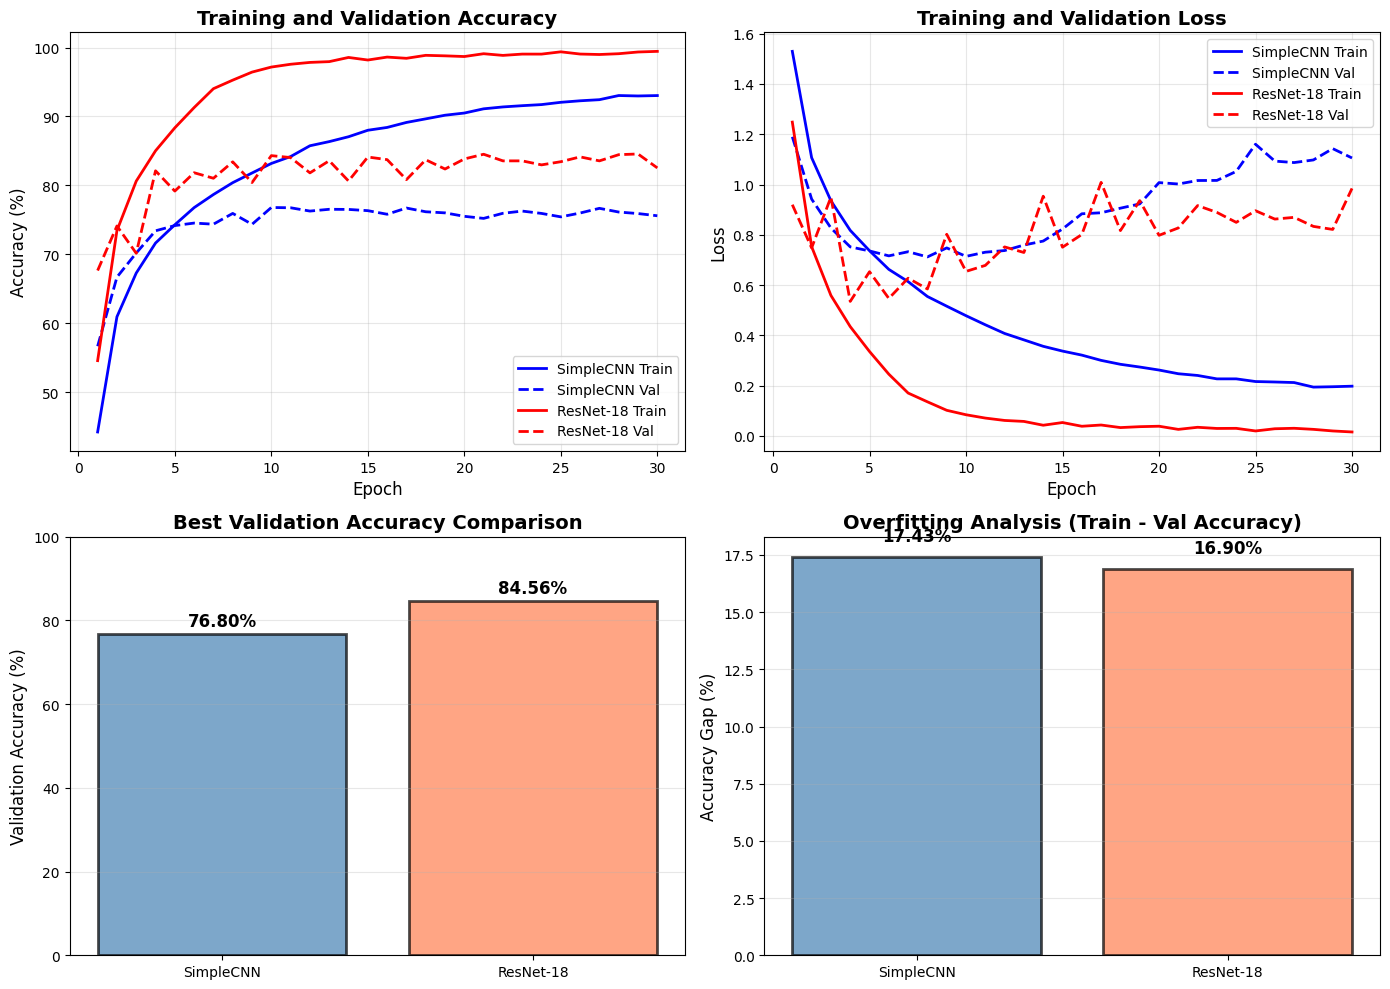

In [ ]:
import matplotlib.pyplot as plt

print("="*60)
print("BASELINE RESULTS COMPARISON")
print("="*60)

print("\nFinal Results:")
print(f"{'Model':<15} {'Train Acc':<12} {'Val Acc':<12} {'Improvement'}")
print("-"*60)
print(f"{'SimpleCNN':<15} {history_simple['train_acc'][-1]:>10.2f}% {history_simple['val_acc'][-1]:>10.2f}% {'(baseline)'}")
simple_best = max(history_simple['val_acc'])
resnet_best = max(history_resnet['val_acc'])
improvement = resnet_best - simple_best
print(f"{'ResNet-18':<15} {history_resnet['train_acc'][-1]:>10.2f}% {history_resnet['val_acc'][-1]:>10.2f}% {f'+{improvement:.2f}%'}")

print(f"\nBest Validation Accuracies:")
print(f"  SimpleCNN: {simple_best:.2f}%")
print(f"  ResNet-18: {resnet_best:.2f}%")
print(f"  Improvement: +{improvement:.2f}%")

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

epochs = range(1, num_epochs + 1)

axes[0, 0].plot(epochs, history_simple['train_acc'], 'b-', label='SimpleCNN Train', linewidth=2)
axes[0, 0].plot(epochs, history_simple['val_acc'], 'b--', label='SimpleCNN Val', linewidth=2)
axes[0, 0].plot(epochs, history_resnet['train_acc'], 'r-', label='ResNet-18 Train', linewidth=2)
axes[0, 0].plot(epochs, history_resnet['val_acc'], 'r--', label='ResNet-18 Val', linewidth=2)
axes[0, 0].set_xlabel('Epoch', fontsize=12)
axes[0, 0].set_ylabel('Accuracy (%)', fontsize=12)
axes[0, 0].set_title('Training and Validation Accuracy', fontsize=14, fontweight='bold')
axes[0, 0].legend(fontsize=10)
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].plot(epochs, history_simple['train_loss'], 'b-', label='SimpleCNN Train', linewidth=2)
axes[0, 1].plot(epochs, history_simple['val_loss'], 'b--', label='SimpleCNN Val', linewidth=2)
axes[0, 1].plot(epochs, history_resnet['train_loss'], 'r-', label='ResNet-18 Train', linewidth=2)
axes[0, 1].plot(epochs, history_resnet['val_loss'], 'r--', label='ResNet-18 Val', linewidth=2)
axes[0, 1].set_xlabel('Epoch', fontsize=12)
axes[0, 1].set_ylabel('Loss', fontsize=12)
axes[0, 1].set_title('Training and Validation Loss', fontsize=14, fontweight='bold')
axes[0, 1].legend(fontsize=10)
axes[0, 1].grid(True, alpha=0.3)

models = ['SimpleCNN', 'ResNet-18']
val_accs = [simple_best, resnet_best]
colors = ['steelblue', 'coral']
bars = axes[1, 0].bar(models, val_accs, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1, 0].set_ylabel('Validation Accuracy (%)', fontsize=12)
axes[1, 0].set_title('Best Validation Accuracy Comparison', fontsize=14, fontweight='bold')
axes[1, 0].set_ylim([0, 100])
axes[1, 0].grid(True, alpha=0.3, axis='y')
for bar, acc in zip(bars, val_accs):
    height = bar.get_height()
    axes[1, 0].text(bar.get_x() + bar.get_width()/2., height + 1,
                    f'{acc:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

simple_gap = history_simple['train_acc'][-1] - history_simple['val_acc'][-1]
resnet_gap = history_resnet['train_acc'][-1] - history_resnet['val_acc'][-1]
gaps = [simple_gap, resnet_gap]
bars = axes[1, 1].bar(models, gaps, color=colors, alpha=0.7, edgecolor='black', linewidth=2)
axes[1, 1].set_ylabel('Accuracy Gap (%)', fontsize=12)
axes[1, 1].set_title('Overfitting Analysis (Train - Val Accuracy)', fontsize=14, fontweight='bold')
axes[1, 1].grid(True, alpha=0.3, axis='y')
for bar, gap in zip(bars, gaps):
    height = bar.get_height()
    axes[1, 1].text(bar.get_x() + bar.get_width()/2., height + 0.5,
                    f'{gap:.2f}%', ha='center', va='bottom', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("\n" + "="*60)

In [ ]:
torch.save(model_simple.state_dict(), 'simplecnn_baseline.pth')
torch.save(model_resnet.state_dict(), 'resnet18_baseline.pth')

print("="*60)
print("MODELS SAVED")
print("="*60)
print("✓ SimpleCNN saved as: simplecnn_baseline.pth")
print("✓ ResNet-18 saved as: resnet18_baseline.pth")
print("\nYou can reload these models later to avoid retraining!")
print("="*60)

MODELS SAVED
✓ SimpleCNN saved as: simplecnn_baseline.pth
✓ ResNet-18 saved as: resnet18_baseline.pth

You can reload these models later to avoid retraining!


In [ ]:
learning_rates = [0.0001, 0.001, 0.01]
lr_results = {}

print("="*60)
print("EXPERIMENT 1: LEARNING RATE EXPLORATION")
print("="*60)
print(f"Model: SimpleCNN")
print(f"Epochs: 15")
print(f"Optimizer: Adam")
print(f"Testing learning rates: {learning_rates}\n")

for lr in learning_rates:
    print(f"\n{'='*60}")
    print(f"Training with Learning Rate = {lr}")
    print(f"{'='*60}")

    model = SimpleCNN(num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    history = {'train_acc': [], 'val_acc': []}

    for epoch in range(15):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)

        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1:2d} - Train: {train_acc:.2f}% | Val: {val_acc:.2f}%")

    best_val = max(history['val_acc'])
    final_val = history['val_acc'][-1]
    lr_results[lr] = {
        'history': history,
        'best_val': best_val,
        'final_val': final_val
    }

    print(f"Best Val Acc: {best_val:.2f}%")
    print(f"Final Val Acc: {final_val:.2f}%")

print("\n" + "="*60)
print("LEARNING RATE RESULTS SUMMARY")
print("="*60)
print(f"{'LR':<10} {'Best Val Acc':<15} {'Final Val Acc':<15}")
print("-"*60)
for lr, results in lr_results.items():
    print(f"{lr:<10} {results['best_val']:>13.2f}% {results['final_val']:>14.2f}%")

best_lr = max(lr_results.items(), key=lambda x: x[1]['best_val'])[0]
print(f"\n✓ Best Learning Rate: {best_lr}")
print("="*60)

EXPERIMENT 1: LEARNING RATE EXPLORATION
Model: SimpleCNN
Epochs: 15
Optimizer: Adam
Testing learning rates: [0.0001, 0.001, 0.01]


Training with Learning Rate = 0.0001


Epoch  5 - Train: 56.83% | Val: 59.54%


Epoch 10 - Train: 65.44% | Val: 65.40%


Epoch 15 - Train: 70.85% | Val: 69.92%
Best Val Acc: 69.92%
Final Val Acc: 69.92%

Training with Learning Rate = 0.001


Epoch  5 - Train: 75.69% | Val: 74.74%


Epoch 10 - Train: 84.51% | Val: 76.54%


Epoch 15 - Train: 89.06% | Val: 76.86%
Best Val Acc: 76.86%
Final Val Acc: 76.86%

Training with Learning Rate = 0.01


Epoch  5 - Train: 10.02% | Val: 10.64%


Epoch 10 - Train: 9.78% | Val: 10.28%


Epoch 15 - Train: 10.08% | Val: 10.28%
Best Val Acc: 10.64%
Final Val Acc: 10.28%

LEARNING RATE RESULTS SUMMARY
LR         Best Val Acc    Final Val Acc  
------------------------------------------------------------
0.0001             69.92%          69.92%
0.001              76.86%          76.86%
0.01               10.64%          10.28%

✓ Best Learning Rate: 0.001


In [ ]:
# Optimizers
optimizers_config = {
    'Adam': {'lr': 0.001},
    'SGD': {'lr': 0.01, 'momentum': 0.9},
    'RMSprop': {'lr': 0.001}
}

optimizer_results = {}

print("="*60)
print("EXPERIMENT 2: OPTIMIZER COMPARISON")
print("="*60)
print(f"Model: SimpleCNN")
print(f"Epochs: 15\n")

for opt_name, config in optimizers_config.items():
    print(f"\n{'='*60}")
    print(f"Training with {opt_name} Optimizer")
    print(f"Config: {config}")
    print(f"{'='*60}")

    model = SimpleCNN(num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()

    if opt_name == 'Adam':
        optimizer = torch.optim.Adam(model.parameters(), lr=config['lr'])
    elif opt_name == 'SGD':
        optimizer = torch.optim.SGD(model.parameters(), lr=config['lr'], momentum=config['momentum'])
    elif opt_name == 'RMSprop':
        optimizer = torch.optim.RMSprop(model.parameters(), lr=config['lr'])

    history = {'train_acc': [], 'val_acc': []}

    for epoch in range(15):
        train_loss, train_acc = train_one_epoch(model, train_loader, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, val_loader, criterion, device)

        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1:2d} - Train: {train_acc:.2f}% | Val: {val_acc:.2f}%")

    best_val = max(history['val_acc'])
    final_val = history['val_acc'][-1]
    optimizer_results[opt_name] = {
        'history': history,
        'best_val': best_val,
        'final_val': final_val
    }

    print(f"Best Val Acc: {best_val:.2f}%")
    print(f"Final Val Acc: {final_val:.2f}%")

print("\n" + "="*60)
print("OPTIMIZER RESULTS SUMMARY")
print("="*60)
print(f"{'Optimizer':<12} {'Best Val Acc':<15} {'Final Val Acc':<15}")
print("-"*60)
for opt, results in optimizer_results.items():
    print(f"{opt:<12} {results['best_val']:>13.2f}% {results['final_val']:>14.2f}%")

best_opt = max(optimizer_results.items(), key=lambda x: x[1]['best_val'])[0]
print(f"\n✓ Best Optimizer: {best_opt}")
print("="*60)

EXPERIMENT 2: OPTIMIZER COMPARISON
Model: SimpleCNN
Epochs: 15


Training with Adam Optimizer
Config: {'lr': 0.001}


Epoch  5 - Train: 75.09% | Val: 73.22%


Epoch 10 - Train: 84.13% | Val: 76.94%


Epoch 15 - Train: 89.24% | Val: 76.16%
Best Val Acc: 76.94%
Final Val Acc: 76.16%

Training with SGD Optimizer
Config: {'lr': 0.01, 'momentum': 0.9}


Epoch  5 - Train: 73.60% | Val: 72.10%


Epoch 10 - Train: 84.18% | Val: 75.66%


Epoch 15 - Train: 89.71% | Val: 77.38%
Best Val Acc: 77.38%
Final Val Acc: 77.38%

Training with RMSprop Optimizer
Config: {'lr': 0.001}


Epoch  5 - Train: 73.76% | Val: 71.40%


Epoch 10 - Train: 82.74% | Val: 71.04%


Epoch 15 - Train: 87.52% | Val: 73.72%
Best Val Acc: 74.72%
Final Val Acc: 73.72%

OPTIMIZER RESULTS SUMMARY
Optimizer    Best Val Acc    Final Val Acc  
------------------------------------------------------------
Adam                 76.94%          76.16%
SGD                  77.38%          77.38%
RMSprop              74.72%          73.72%

✓ Best Optimizer: SGD


In [ ]:
# Batch Size
batch_sizes = [32, 64, 128]
batch_results = {}

print("="*60)
print("EXPERIMENT 3: BATCH SIZE COMPARISON")
print("="*60)
print(f"Model: SimpleCNN")
print(f"Epochs: 15")
print(f"Optimizer: SGD (lr=0.01, momentum=0.9)\n")

for bs in batch_sizes:
    print(f"\n{'='*60}")
    print(f"Training with Batch Size = {bs}")
    print(f"{'='*60}")

    train_loader_exp = DataLoader(train_subset_norm, batch_size=bs, shuffle=True, num_workers=2)
    val_loader_exp = DataLoader(val_subset_norm, batch_size=bs, shuffle=False, num_workers=2)

    model = SimpleCNN(num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

    history = {'train_acc': [], 'val_acc': []}

    for epoch in range(15):
        train_loss, train_acc = train_one_epoch(model, train_loader_exp, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, val_loader_exp, criterion, device)

        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1:2d} - Train: {train_acc:.2f}% | Val: {val_acc:.2f}%")

    best_val = max(history['val_acc'])
    final_val = history['val_acc'][-1]
    batch_results[bs] = {
        'history': history,
        'best_val': best_val,
        'final_val': final_val
    }

    print(f"Best Val Acc: {best_val:.2f}%")
    print(f"Final Val Acc: {final_val:.2f}%")

print("\n" + "="*60)
print("BATCH SIZE RESULTS SUMMARY")
print("="*60)
print(f"{'Batch Size':<12} {'Best Val Acc':<15} {'Final Val Acc':<15}")
print("-"*60)
for bs, results in batch_results.items():
    print(f"{bs:<12} {results['best_val']:>13.2f}% {results['final_val']:>14.2f}%")

best_bs = max(batch_results.items(), key=lambda x: x[1]['best_val'])[0]
print(f"\n✓ Best Batch Size: {best_bs}")
print("="*60)

EXPERIMENT 3: BATCH SIZE COMPARISON
Model: SimpleCNN
Epochs: 15
Optimizer: SGD (lr=0.01, momentum=0.9)


Training with Batch Size = 32


Epoch  5 - Train: 74.60% | Val: 74.14%


Epoch 10 - Train: 81.56% | Val: 73.74%


Epoch 15 - Train: 83.36% | Val: 73.98%
Best Val Acc: 75.00%
Final Val Acc: 73.98%

Training with Batch Size = 64


Epoch  5 - Train: 73.40% | Val: 73.10%


Epoch 10 - Train: 84.14% | Val: 75.44%


Epoch 15 - Train: 88.95% | Val: 76.84%
Best Val Acc: 76.84%
Final Val Acc: 76.84%

Training with Batch Size = 128


Epoch  5 - Train: 68.79% | Val: 70.10%


Epoch 10 - Train: 80.16% | Val: 75.96%


Epoch 15 - Train: 87.28% | Val: 76.98%
Best Val Acc: 77.50%
Final Val Acc: 76.98%

BATCH SIZE RESULTS SUMMARY
Batch Size   Best Val Acc    Final Val Acc  
------------------------------------------------------------
32                   75.00%          73.98%
64                   76.84%          76.84%
128                  77.50%          76.98%

✓ Best Batch Size: 128


In [ ]:
# Regularization with decays
weight_decays = [0, 1e-4, 1e-3]
wd_results = {}

print("="*60)
print("EXPERIMENT 4: WEIGHT DECAY (REGULARIZATION)")
print("="*60)
print(f"Model: SimpleCNN")
print(f"Epochs: 15")
print(f"Optimizer: SGD (lr=0.01, momentum=0.9, batch_size=128)\n")

train_loader_best = DataLoader(train_subset_norm, batch_size=128, shuffle=True, num_workers=2)
val_loader_best = DataLoader(val_subset_norm, batch_size=128, shuffle=False, num_workers=2)

for wd in weight_decays:
    print(f"\n{'='*60}")
    print(f"Training with Weight Decay = {wd}")
    print(f"{'='*60}")

    model = SimpleCNN(num_classes=10).to(device)
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.SGD(model.parameters(), lr=0.01, momentum=0.9, weight_decay=wd)

    history = {'train_acc': [], 'val_acc': []}

    for epoch in range(15):
        train_loss, train_acc = train_one_epoch(model, train_loader_best, criterion, optimizer, device)
        val_loss, val_acc = evaluate(model, val_loader_best, criterion, device)

        history['train_acc'].append(train_acc)
        history['val_acc'].append(val_acc)

        if (epoch + 1) % 5 == 0:
            print(f"Epoch {epoch+1:2d} - Train: {train_acc:.2f}% | Val: {val_acc:.2f}%")

    best_val = max(history['val_acc'])
    final_val = history['val_acc'][-1]
    train_val_gap = history['train_acc'][-1] - history['val_acc'][-1]

    wd_results[wd] = {
        'history': history,
        'best_val': best_val,
        'final_val': final_val,
        'overfitting_gap': train_val_gap
    }

    print(f"Best Val Acc: {best_val:.2f}%")
    print(f"Final Val Acc: {final_val:.2f}%")
    print(f"Train-Val Gap: {train_val_gap:.2f}% (overfitting measure)")

print("\n" + "="*60)
print("WEIGHT DECAY RESULTS SUMMARY")
print("="*60)
print(f"{'Weight Decay':<15} {'Best Val':<12} {'Final Val':<12} {'Overfit Gap'}")
print("-"*60)
for wd, results in wd_results.items():
    print(f"{wd:<15} {results['best_val']:>10.2f}% {results['final_val']:>10.2f}% {results['overfitting_gap']:>10.2f}%")

best_wd = max(wd_results.items(), key=lambda x: x[1]['best_val'])[0]
print(f"\n✓ Best Weight Decay: {best_wd}")
print("="*60)

EXPERIMENT 4: WEIGHT DECAY (REGULARIZATION)
Model: SimpleCNN
Epochs: 15
Optimizer: SGD (lr=0.01, momentum=0.9, batch_size=128)


Training with Weight Decay = 0


Epoch  5 - Train: 68.47% | Val: 69.50%


Epoch 10 - Train: 80.07% | Val: 75.68%


Epoch 15 - Train: 86.93% | Val: 76.44%
Best Val Acc: 77.04%
Final Val Acc: 76.44%
Train-Val Gap: 10.49% (overfitting measure)

Training with Weight Decay = 0.0001


Epoch  5 - Train: 68.31% | Val: 70.50%


Epoch 10 - Train: 79.88% | Val: 76.50%


Epoch 15 - Train: 86.62% | Val: 77.50%
Best Val Acc: 77.50%
Final Val Acc: 77.50%
Train-Val Gap: 9.12% (overfitting measure)

Training with Weight Decay = 0.001


Epoch  5 - Train: 66.70% | Val: 65.72%


Epoch 10 - Train: 78.16% | Val: 75.36%


Epoch 15 - Train: 84.76% | Val: 77.06%
Best Val Acc: 77.06%
Final Val Acc: 77.06%
Train-Val Gap: 7.70% (overfitting measure)

WEIGHT DECAY RESULTS SUMMARY
Weight Decay    Best Val     Final Val    Overfit Gap
------------------------------------------------------------
0                    77.04%      76.44%      10.49%
0.0001               77.50%      77.50%       9.12%
0.001                77.06%      77.06%       7.70%

✓ Best Weight Decay: 0.0001
